In [3]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
dataset = load_wine()
x, y = dataset.data, dataset.target

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size = 0.3, random_state = 42)

In [6]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 8, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [10, 20, 50, 100, 200]
}

In [7]:
clf = RandomForestClassifier(random_state = 42)
grid_cv = GridSearchCV(clf, parameters, cv = 10, n_jobs = -1)
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 50, 100, 200]})

In [8]:
print(f"Parameters of best model: {grid_cv.best_params_}")
print(f"Score of best model: {grid_cv.best_score_}")

Parameters of best model: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 20}
Score of best model: 0.9839743589743589


In [9]:
score = grid_cv.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.9444444444444444


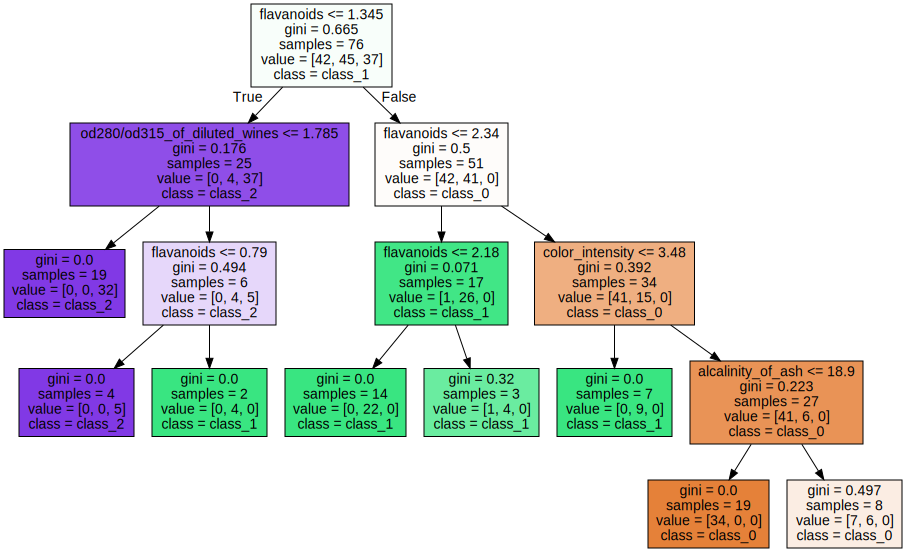

In [18]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

for index in range(0, 3):
    dot_data = tree.export_graphviz(grid_cv.best_estimator_.estimators_[index], 
                                out_file=None, 
                                feature_names=dataset.feature_names,  
                                class_names=dataset.target_names,
                                filled=True,);
    graph = graphviz.Source(dot_data, format="png") 
graph

In [19]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

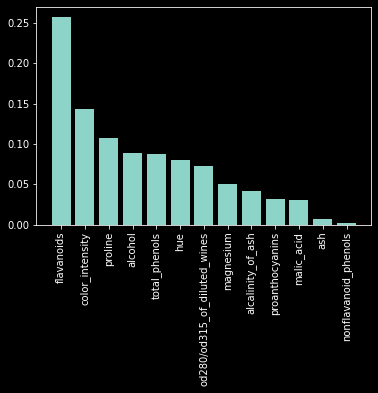

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# best_model = grid_cv.best_estimator_
importances = grid_cv.best_estimator_.feature_importances_

# Zeige die Wichtigkeit der Merkmale in einem Bar-Diagramm
sorted_idx = np.argsort(importances)[::-1]
labels = np.array(dataset.feature_names)[sorted_idx]
plt.bar(range(x.shape[1]), importances[sorted_idx])
plt.xticks(range(x.shape[1]), labels, rotation=90)
plt.show()  